In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("loan.csv")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [3]:
df = data
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [5]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [6]:
col = ['Gender','Married','Dependents','Self_Employed','Term','Credit_History']

In [7]:
for i in col:
    print(df[i].value_counts())
    print("---------------------")
    

Male      489
Female    112
Name: Gender, dtype: int64
---------------------
Yes    398
No     213
Name: Married, dtype: int64
---------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
---------------------
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Term, dtype: int64
---------------------
1.0    475
0.0     89
Name: Credit_History, dtype: int64
---------------------


In [8]:
for i in col:
    d = df[i].value_counts()
    df[i] = df[i].fillna(d.index[0])

In [9]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [10]:
df['Dependents'].replace("3+","3",inplace=True)

In [11]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [12]:
cols_2 = ["Dependents", "Coapplicant_Income", "Term", "Credit_History"]

In [13]:
for i in cols_2:
    df[i] = df[i].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              614 non-null    object
 1   Married             614 non-null    object
 2   Dependents          614 non-null    int64 
 3   Education           614 non-null    object
 4   Self_Employed       614 non-null    object
 5   Applicant_Income    614 non-null    int64 
 6   Coapplicant_Income  614 non-null    int64 
 7   Loan_Amount         614 non-null    int64 
 8   Term                614 non-null    int64 
 9   Credit_History      614 non-null    int64 
 10  Area                614 non-null    object
 11  Status              614 non-null    object
dtypes: int64(6), object(6)
memory usage: 57.7+ KB


In [15]:
obj_cols = ['Gender','Married', 'Education', 'Self_Employed', 'Area', 'Status']

num_cols = ['Dependents', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History']

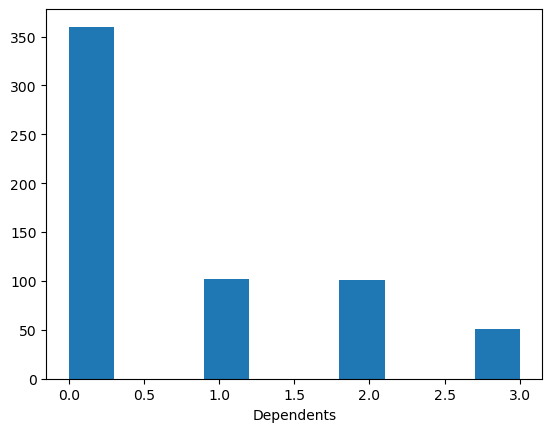

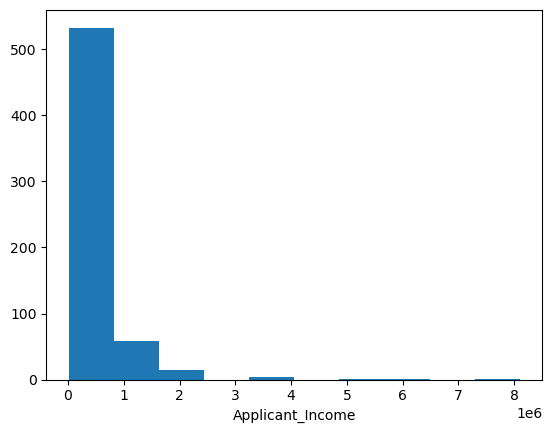

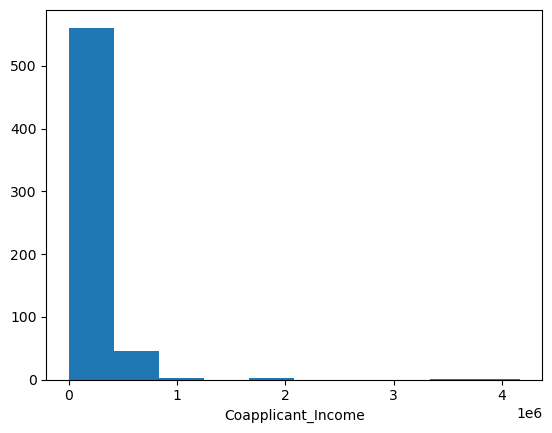

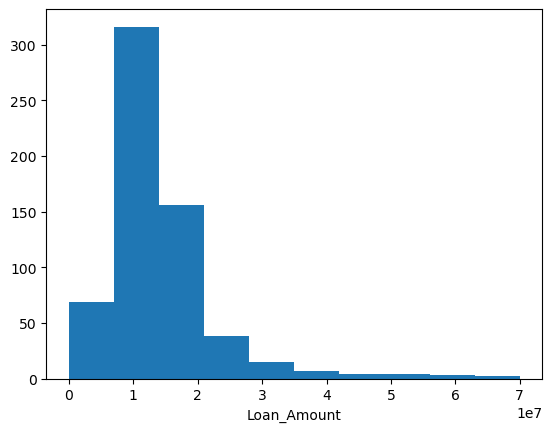

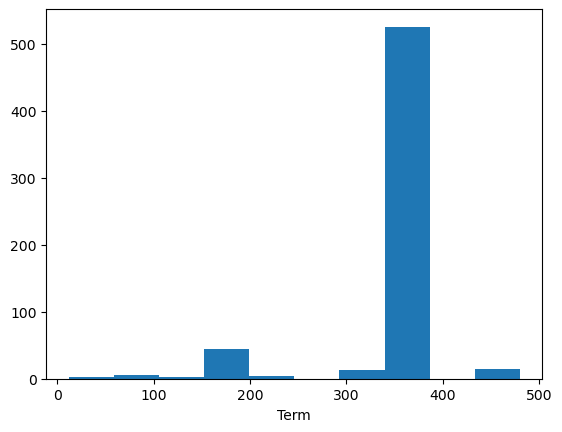

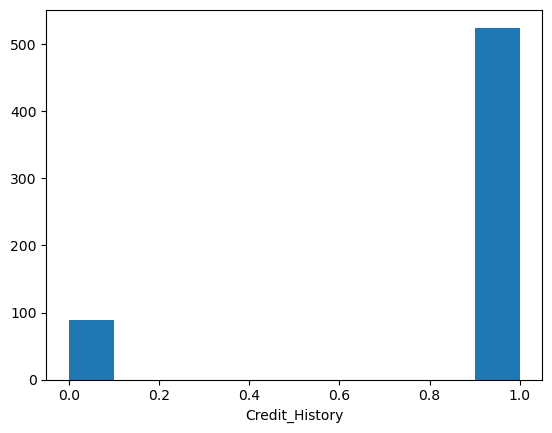

In [16]:
for i in num_cols:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

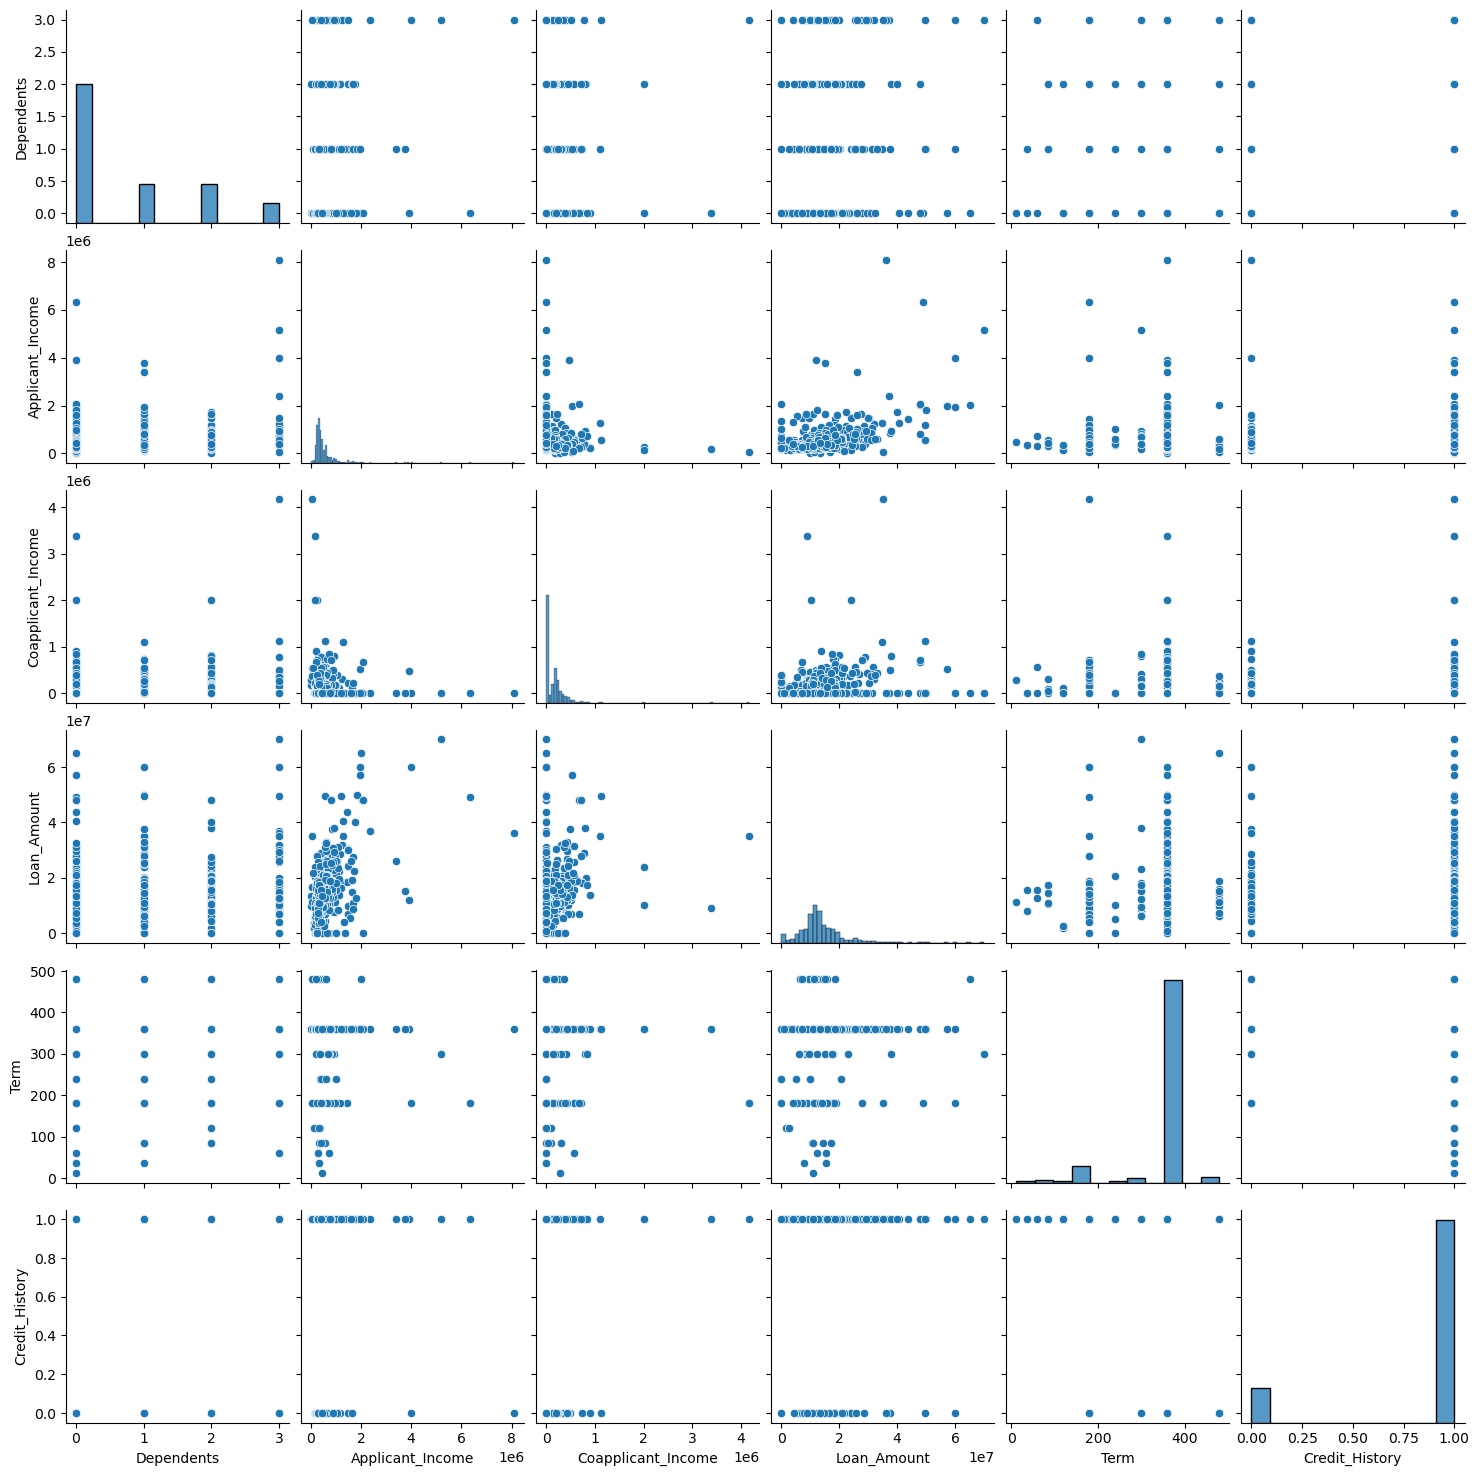

In [17]:
sns.pairplot(df[num_cols])
plt.show()

In [18]:
for i in obj_cols:
    df=pd.get_dummies(df, columns = [i],dtype = "int64", drop_first = True)

In [19]:
df.head()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Area_Semiurban,Area_Urban,Status_Y
0,0,584900,0,15000000,360,1,1,0,0,0,0,1,1
1,1,458300,150800,12800000,360,1,1,1,0,0,0,0,0
2,0,300000,0,6600000,360,1,1,1,0,1,0,1,1
3,0,258300,235800,12000000,360,1,1,1,1,0,0,1,1
4,0,600000,0,14100000,360,1,1,0,0,0,0,1,1


In [20]:
X = df.drop("Status_Y", axis = 1)
y = df["Status_Y"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=125)

In [23]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [24]:
model = MultinomialNB()

In [25]:
model.fit(X_train, y_train)

MultinomialNB()

In [26]:
y_pred = model.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[21, 27],
       [39, 36]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.44      0.39        48
           1       0.57      0.48      0.52        75

    accuracy                           0.46       123
   macro avg       0.46      0.46      0.46       123
weighted avg       0.49      0.46      0.47       123



In [29]:
accuracy_score(y_test, y_pred)

0.4634146341463415

In [30]:
model_2 = BernoulliNB() 

In [31]:
model_2.fit(X_train, y_train)

BernoulliNB()

In [32]:
y_pred2 = model_2.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.40      0.54        48
           1       0.71      0.96      0.82        75

    accuracy                           0.74       123
   macro avg       0.79      0.68      0.68       123
weighted avg       0.77      0.74      0.71       123



In [34]:
confusion_matrix(y_test, y_pred2)

array([[19, 29],
       [ 3, 72]], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred2)

0.7398373983739838